In [1]:
from vpython import canvas, triangle, vector, vertex, color, quad, distant_light
import numpy as np
from scipy.interpolate import Rbf, RBFInterpolator
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

<IPython.core.display.Javascript object>

In [2]:
%%time
# [x, y, v] point location and value

val = [
    [0, 0, 2],
    [1, -1, 3],
    [2, -2, 4],
    [1, -3, 5],
    [3, -4, 3]
]

x = [item[0] for item in val]
y = [item[1] for item in val]
d = [item[2] for item in val]

CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 6.91 µs


In [3]:
# create 100x100 surface (?)

dim = 10

X = np.linspace(
    start=min(x),
    stop=max(x),
    num=dim
)

Y = np.linspace(
    start=min(y),
    stop=max(y),
    num=dim
)

XD, YD = np.meshgrid(X, Y)
# print(max(map(max, DD)), min(map(min, DD)))
# print(max(d), min(d))
# print(max(Y), min(Y))
# print(max(map(max, YD)), min(map(min, YD)))

In [4]:
def ye(XD, YD, DD):
    fig, ax = plt.subplots()
    ax.pcolormesh(XD, YD, DD, shading='gouraud', vmin=min(d), vmax=max(d))
    p = ax.scatter(XD, YD, c=DD, s=50, ec='k', vmin=min(d), vmax=max(d))
    fig.colorbar(p)
    plt.show()

(10, 10)


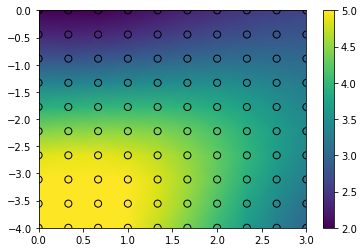

CPU times: user 240 ms, sys: 152 ms, total: 392 ms
Wall time: 185 ms


In [5]:
%%time
# using interpolate.Rbf

rbfi = Rbf(x, y, d)
DD = rbfi(XD, YD)
print(DD.shape)
ye(XD, YD, DD)

(100,)


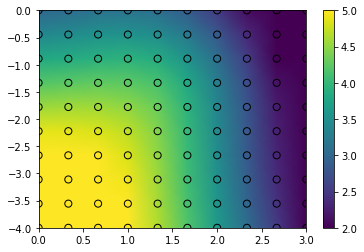

CPU times: user 203 ms, sys: 166 ms, total: 369 ms
Wall time: 160 ms


In [6]:
%%time
# using RBFInterpolator

xy = [[item, y[i]] for i, item in enumerate(x)]
rbfi = RBFInterpolator(
    xy,
    d,
    neighbors=dim,
    kernel='thin_plate_spline'
)

XY = []
for x_ in X:
    for y_ in Y:
        XY.append([x_, y_])
DD = rbfi(XY)
print(DD.shape)
ye(XD, YD, DD.reshape(dim, -1))

In [7]:
xdflat = XD.reshape(-1)
ydflat = YD.reshape(-1)

points = [
    [item, ydflat[i]] for i, item in enumerate(xdflat)
]

tri = Delaunay(points, incremental=True)

In [8]:
def le_color(val, maxval=1, minval=0):
    vale = val / (maxval - minval)
    return vector(vale, 1-vale, 0)

def le_surface(triangles, vertices):
    scene = canvas()

    # https://www.glowscript.org/docs/VPythonDocs/color.html

    mind = min(d)
    maxd = max(d)
    
    quads = None
    for vert in vertices:
    #     print(vert)
        quads = [
            [*triangles[trong_id],]
            for trong_id in vert
        ]
        verts = [
            vertex(
                pos=vector(*item),
                color=le_color(item[2], maxd, mind),
            ) for item in quads
        ]
        triangle(vs=verts)

    scene.camera.follow(scene.objects[0])
    return scene

In [9]:
triangles = tri.points

vertices = tri.vertices

triangle_z = rbfi(triangles)

triangles = [
    [*item, triangle_z[i]]
    for i, item in enumerate(triangles)
]

le_surface(triangles, vertices)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>